<a href="https://colab.research.google.com/github/Arfan498/RVC/blob/main/RVC_Genshin_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

# RVC Genshin Impact
</div>

----
Google has recently taken actions to restrict the usage of the RVC code, I'm not sure how long this RVC will last.<br/>It appears that instead of directly blocking the code, they are limiting access to various resources.

----
##### Changelog 2024.1.10
- Fix missing model on CLI Infer

# Pick your choice to use the infer (CLI Infer or New Infer)

# CLI Infer (Recommended)

### How to Use?

1. Click the cell number 1 & 2.
2. Use youtube link as audio input or Upload song on Infer\SONG_INPUT using Google Colab Files Explorer then input name file of the file that you've uploaded to that folder.
3. Click the cell number 3.
4. Wait until its done,
5. Done.

In [1]:
#@title 1. Clone Repository & Install Requirement

!git clone https://github.com/ArkanDash/Infer.git
!apt-get install -qq -y aria2
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M "https://raw.githubusercontent.com/ArkanDash/rvc-genshin-model/master/genshin_model.json" -d "/content/rvc-genshin-model"
%cd Infer
!pip install -q -r requirements.txt
!sudo apt update
!sudo apt install sox

Cloning into 'Infer'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 342 (delta 193), reused 170 (delta 170), pack-reused 130
Receiving objects: 100% (342/342), 1.81 MiB | 5.60 MiB/s, done.
Resolving deltas: 100% (214/214), done.
Selecting previously unselected package libc-ares2:amd64.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../libc-ares2_1.18.1-1ubuntu0.22.04.2_amd64.deb ...
Unpacking libc-ares2:amd64 (1.18.1-1ubuntu0.22.04.2) ...
Selecting previously unselected package libaria2-0:amd64.
Preparing to unpack .../libaria2-0_1.36.0-1_amd64.deb ...
Unpacking libaria2-0:amd64 (1.36.0-1) ...
Selecting previously unselected package aria2.
Preparing to unpack .../aria2_1.36.0-1_amd64.deb ...
Unpacking aria2 (1.36.0-1) ...
Setting up libc-ares2:amd64 (1.18.1-1ubuntu0.22.04.2) ...
Setting up libaria2-0:amd64 (1.36.0-1) ...
Setting up ar

In [2]:
#@title 2. Download MDXNet Vocal Separation and Hubert Base Models
!python src/download_models.py

All models downloaded!


In [ ]:
# @title 3. Generate (For output look below)

# @markdown You can use youtube link or upload your audio file on Infer/SONG_INPUT<br />
# @markdown Example: audio.wav, https://www.youtube.com/watch?v=4wwi-wdpeck
SONG_INPUT = "https://www.youtube.com/watch?v=Vz1Ke4nABOk" # @param {type:"string"}
CHARACTER = "furina-jp-v2" # @param ["ayaka-jp","ayato-jp","diluc-jp","eula-jp","fischl-jp","ganyu-jp","hutao-jp","kaeya-jp","keqing-jp","klee-jp","kokomi-jp","mona-jp","nahida-jp","nilou-jp","wanderer-jp","yaemiko-jp","yelan-jp","yoimiya-jp","zhongli-jp","aether-jp-v2","albedo-jp-v2","alhaitam-jp-v2","amber-jp-v2","ayaka-jp-v2","barbara-jp-v2","bennett-jp-v2","charlotte-jp-v2","chongyun-jp-v2","cyno-jp-v2","dehya-jp-v2","diona-jp-v2","dori-jp-v2","faruzan-jp-v2","furina-jp-v2","greaterLordRukkhadevata-jp-v2","itto-jp-v2","jean-jp-v2","kaveh-jp-v2","kazuha-jp-v2","kuki-jp-v2","lisa-jp-v2","lumine-jp-v2","lynette-jp-v2","lyney-jp-v2","nahida-jp-v2","navia-jp-v2","neuvillette-jp-v2","nilou-jp-v2","ningguang-jp-v2","noelle-jp-v2","paimon-jp-v2","qiqi-jp-v2","raiden-jp-v2","razor-jp-v2","rosaria-jp-v2","sara-jp-v2","shenhe-jp-v2","sigewinne-jp-v2","signora-jp-v2","sucrose-jp-v2","tartaglia-jp-v2","venti-jp-v2","wriothesley-jp-v2","xiao-jp-v2","yanfei-jp-v2","zhongli-jp-v2"]

# @markdown Audio Editor Options
PITCH_CHANGE = 0 # @param {type:"integer"}
PITCH_CHANGE_ALL = 0 # @param {type:"integer"}
# @markdown Voice Conversion Options
INDEX_RATE = 0.6 # @param {type:"number"}
FILTER_RADIUS = 3 # @param {type:"integer"}
PITCH_DETECTION_ALGO = "rmvpe" # @param ["pm", "harvest", "rmvpe", "crepe", "mangio-crepe"]
CREPE_HOP_LENGTH = 128 # @param {type:"integer"}
PROTECT = 0.5 # @param {type:"number"}
REMIX_MIX_RATE = 0.25  # @param {type:"number"}
# @markdown Audio Mixing Options
MAIN_VOL = 0 # @param {type:"integer"}
BACKUP_VOL = 0 # @param {type:"integer"}
INST_VOL = -1 # @param {type:"integer"}
# @markdown Reverb Control
REVERB_SIZE = 0.15 # @param {type:"number"}
REVERB_WETNESS = 0.2 # @param {type:"number"}
REVERB_DRYNESS = 0.8 # @param {type:"number"}
REVERB_DAMPING = 0.7 # @param {type:"number"}
# @markdown Output Format
OUTPUT_FORMAT = "mp3" # @param ["mp3", "wav"]

import subprocess
import json
import os
import zipfile
import glob
import shutil

def extract_zip(zip_file, target_folder):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(target_folder)

def move_folder_contents(src, dest):
    src_contents = os.listdir(src)
    for item in src_contents:
        src_item = os.path.join(src, item)
        dest_item = os.path.join(dest, item)
        if os.path.isdir(src_item):
            shutil.move(src_item, dest_item)
        else:
            shutil.move(src_item, dest)

with open('/content/rvc-genshin-model/genshin_model.json', 'r') as file:
    data = json.load(file)

if not os.path.exists(f"rvc_models/{CHARACTER}"):
  models = data["model_data"]
  for item in models:
    if CHARACTER == item[1]:
      subprocess.run(['mkdir', f'rvc_models/{item[1]}'])
      folder_path = f'rvc_models/{item[1]}'
      subprocess.run(['wget', '-P', folder_path, item[2]])
      zip_files = glob.glob(os.path.join(folder_path, "*.zip"))
      if len(zip_files) == 1:
        zip_file = zip_files[0]
        extract_zip(zip_file, folder_path)
        os.remove(zip_file)
        subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
        if len(subfolders) == 1:
          subfolder = subfolders[0]
          move_folder_contents(os.path.join(folder_path, subfolder), folder_path)
          os.rmdir(os.path.join(folder_path, subfolder))
        else:
          print("Error: Multiple zip files found.")
else:
    print(f"The model for {CHARACTER} already exists in rvc_models.")

command = [
    "python",
    "src/main.py",
    "-i", SONG_INPUT,
    "-dir", CHARACTER,
    "-p", str(PITCH_CHANGE),
    "-k",
    "-ir", str(INDEX_RATE),
    "-fr", str(FILTER_RADIUS),
    "-rms", str(REMIX_MIX_RATE),
    "-palgo", PITCH_DETECTION_ALGO,
    "-hop", str(CREPE_HOP_LENGTH),
    "-pro", str(PROTECT),
    "-mv", str(MAIN_VOL),
    "-bv", str(BACKUP_VOL),
    "-iv", str(INST_VOL),
    "-pall", str(PITCH_CHANGE_ALL),
    "-rsize", str(REVERB_SIZE),
    "-rwet", str(REVERB_WETNESS),
    "-rdry", str(REVERB_DRYNESS),
    "-rdamp", str(REVERB_DAMPING),
    "-oformat", OUTPUT_FORMAT
]

# Open a subprocess and capture its output
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, universal_newlines=True)

# Print the output in real-time
for line in process.stdout:
    print(line, end='')

# Wait for the process to finish
process.wait()

Error: Multiple zip files found.
2024-02-02 16:04:48.668716: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 16:04:48.668761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 16:04:48.670492: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 16:04:48.678623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-02 1

Example of generated audio path <br />
Output generated inside "Infer\song_output\random_number"

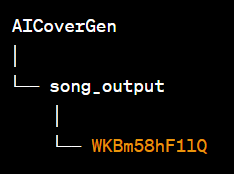

### Repository by [SociallyIneptWeeb](https://github.com/SociallyIneptWeeb/AICoverGen), Colab code by [ardha27](https://github.com/ardha27/AICoverGen-NoUI-Colab), Edited by ArkanDash

# New Infer (Unstable / Beta)

### How to Use?

1. Run the first and second cell.
2. Wait until it's done, then run the third cell.
3. After that you get a two link, click the public link.
4. Use it.

In [ ]:
#@title 1. Clone Repository & Install Dependencies
!python -m pip install -U pip wheel
!apt-get update
!apt-get install -qq -y aria2
!git clone -b master https://github.com/ArkanDash/rvc-inference-new
!pip install -r /content/rvc-inference-new/requirements.txt

In [ ]:
#@title 2. Download Hubert Base, RVMPE, and Genshin AI Data
!wget https://cdn.discordapp.com/attachments/1143928191585628230/1168925510802341959/model-dl.py
!python model-dl.py

In [ ]:
#@title 3. Run as Gradio
%cd /content/rvc-inference-new/
!python inference.py --colab

# Report an issue
You can report the issue by contact me in discord or on huggingface.

[HuggingFace](https://huggingface.co/ArkanDash)

[Discord Server](https://discord.gg/hvmsukmBHE)